In [12]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
conn = pymysql.connect(host='172.20.181.194', user='Oh', password='1234',
db='team5', charset='utf8')


cur = conn.cursor()
cur.execute("select year, 명품 from ys_dept_Luxury_sales where year between 2008 and 2023")

rows = cur.fetchall() # 모든 데이터를 가져옴


dept_Luxury_sales_df = pd.DataFrame(rows ,columns = ['year','luxury_sales'])
print(dept_Luxury_sales_df)

cur.close()
conn.close()

    year  luxury_sales
0   2008          28.4
1   2009          15.7
2   2010          12.4
3   2011          19.8
4   2012           3.1
5   2013           4.4
6   2014           3.7
7   2015           3.3
8   2016           8.7
9   2017           5.4
10  2018          10.5
11  2019          18.5
12  2020          15.1
13  2021          37.9
14  2022          14.4
15  2023           0.5


In [14]:
dept_Luxury_sales_df=dept_Luxury_sales_df.set_index('year')

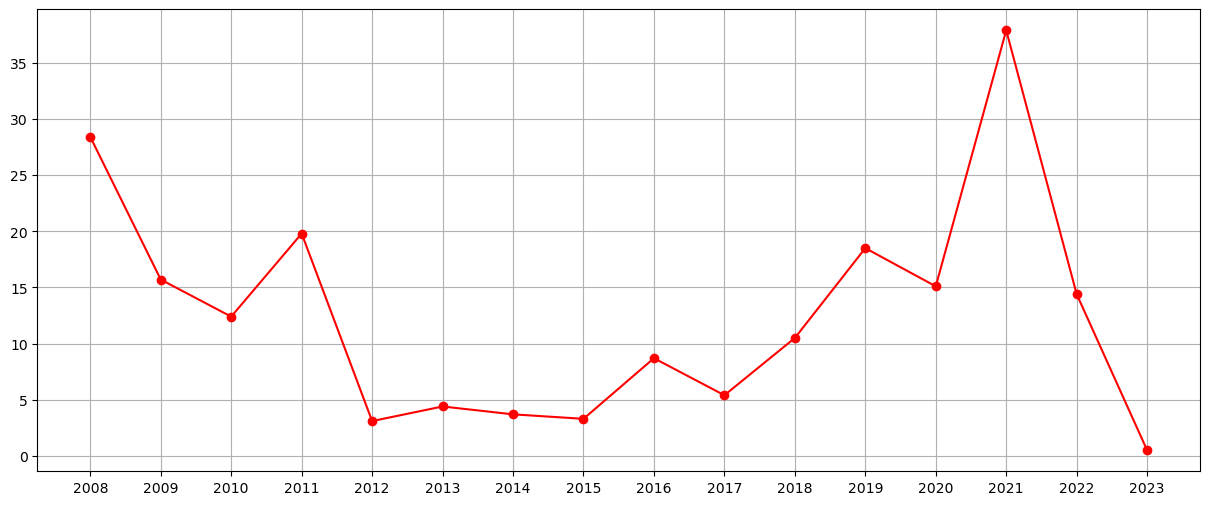

In [15]:
# 백화점 명품 매출
plt.figure(figsize=(15, 6))

plt.plot(dept_Luxury_sales_df.index, dept_Luxury_sales_df.luxury_sales, color='red', marker='o')


plt.xticks(dept_Luxury_sales_df.index)



plt.grid()
plt.savefig("graph.png", dpi=300, transparent=True)
plt.show()

   - 2008년 이후 명품 매출은 변동성이 크며, 특히 2021년에 급증한 후 2023년에 거의 0에 가까운 수준으로 감소
   - 2021년의 급등은 특정 경제적 또는 사회적 요인(예: 코로나 팬데믹 후 보복 소비)이 작용했을 가능성

<hr>

In [16]:
conn2 = pymysql.connect(host='172.20.181.194', user='Oh', password='1234',
db='team5', charset='utf8')

query2 = """select l.year, l.명품, c.`기타 개인용품`, com.`소매판매액지수_증감률`, com.`경제성장률`from ys_dept_Luxury_sales as l 
inner join cpi as c on l.year = c.year
inner join common as com on l.year = com.year
where c.year between 2008 and 2023 
and com.year between 2008 and 2023"""
cur2 = conn2.cursor()
cur2.execute(query2)

rows2 = cur2.fetchall() # 모든 데이터를 가져옴


dept_Luxury_sales_df2 = pd.DataFrame(rows2, columns=['year', 'luxury_sales','cpi','csi_common', 'growth'])
print(dept_Luxury_sales_df2)

cur2.close()
conn2.close()

    year  luxury_sales     cpi  csi_common  growth
0   2008          28.4 -46.940         1.1     3.0
1   2009          15.7 -35.639         2.7     0.8
2   2010          12.4 -28.474         6.6     7.0
3   2011          19.8 -25.398         4.7     3.7
4   2012           3.1 -23.028         2.5     2.5
5   2013           4.4 -18.805         0.7     3.3
6   2014           3.7 -14.391         2.0     3.2
7   2015           3.3  -7.825         4.0     2.9
8   2016           8.7  -5.698         4.0     3.2
9   2017           5.4  -3.702         2.0     3.4
10  2018          10.5  -2.569         4.3     3.2
11  2019          18.5  -0.495         2.4     2.3
12  2020          15.1   0.000        -0.1    -0.7
13  2021          37.9  -0.660         5.8     4.6
14  2022          14.4   1.540        -0.3     2.7
15  2023           0.5   8.100        -1.5     1.4


In [17]:
dept_Luxury_sales_df2=dept_Luxury_sales_df2.set_index('year')

In [18]:
# 상관관계 분석
correlation = dept_Luxury_sales_df2.corr()
correlation

,luxury_sales,cpi,csi_common,growth
luxury_sales,1.000000,-0.218264,0.327955,0.161815
cpi,-0.218264,1.000000,-0.234963,-0.222896
csi_common,0.327955,-0.234963,1.000000,0.702508
growth,0.161815,-0.222896,0.702508,1.000000


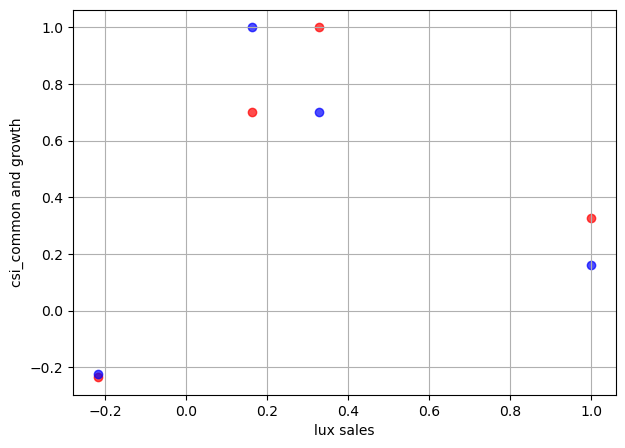

In [19]:
xData = correlation["luxury_sales"]
yData1 = correlation["csi_common"]
yData2 = correlation["growth"]

# 산점도 그리기
plt.figure(figsize=(7, 5))
plt.scatter(xData, yData1, alpha=0.7, color="red")
plt.scatter(xData, yData2, alpha=0.7, color="blue")


# 제목 및 라벨 설정

plt.xlabel("lux sales")
plt.ylabel("csi_common and growth")
plt.grid()

# 그래프 출력
plt.savefig("graph.png", dpi=300, transparent=True)
plt.show()





luxury_sales (명품 매출) vs csi_common (소비자물가지수)
     
     - 상관계수: 0.327955 → 관계 없음 (가능성 정도)

luxury_sales vs growth (경제 성장률)
     
     - 상관계수: 0.161815 → 매우 약한 상관관계.경제 침체와 명품 매출과 직접적인 연관성은 크지 않음

- 명품 매출(luxury_sales)은 경제 성장률(GDP 성장률)보다는 소매 판매액 증감률(Csi)와 더 밀접한 관계를 가짐.
- 하지만 Csi와의 상관계수도 강한 편은 아니므로, 명품 매출에는 소득 수준, 소비 트렌드, 정책 변화, 환율 등 추가적인 요인이 작용할 가능성이 큼.
- 2021년의 매출 급등은 단순한 경제적 요인보다는 코로나 이후 소비 습관의 변화, 자산 효과(부동산 및 주식 상승), 공급망 문제에 따른 명품 희소성 등이 영향을 미쳤을 가능성이 큼.
